In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random
import glob
import os

# Mediciones de control

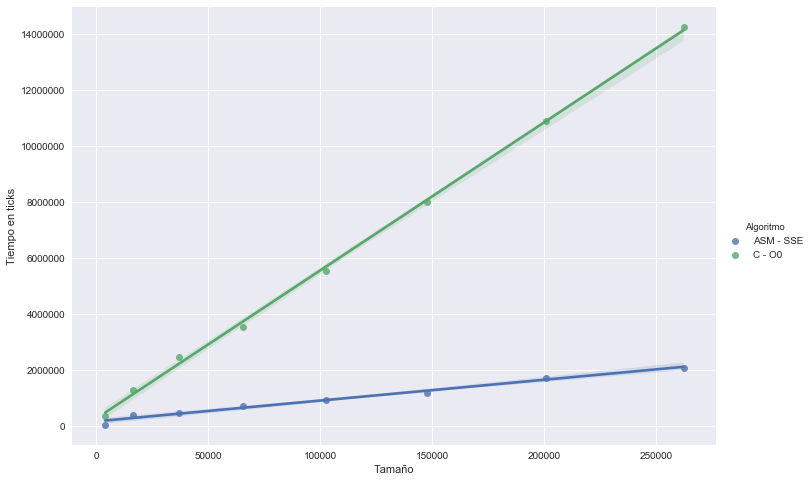

In [13]:
df = pd.read_csv('rgb2yuv-control.csv')

df['Algoritmo'] = df['Algoritmo'].map({1: 'ASM - SSE', 0: 'C - O0'})

df = df.groupby(['Algoritmo', 'Tamaño']).min()
df.reset_index(inplace=True)

sns.lmplot(x='Tamaño', y='Ticks', data=df, hue='Algoritmo', truncate=True, size=7, aspect=1.4)
plt.ylabel('Tiempo en ticks')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

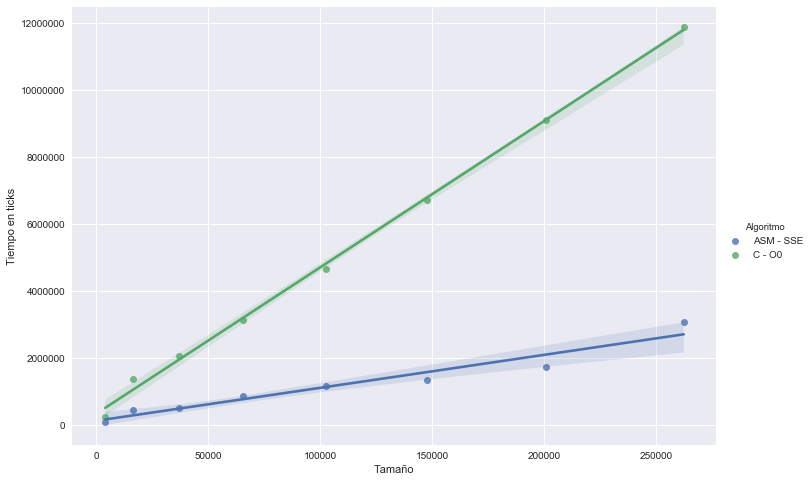

In [14]:
df = pd.read_csv('yuv2rgb-control.csv')

df['Algoritmo'] = df['Algoritmo'].map({1: 'ASM - SSE', 0: 'C - O0'})

df = df.groupby(['Algoritmo', 'Tamaño']).min()
df.reset_index(inplace=True)

sns.lmplot(x='Tamaño', y='Ticks', data=df, hue='Algoritmo', truncate=True, size=7, aspect=1.4)
plt.ylabel('Tiempo en ticks')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

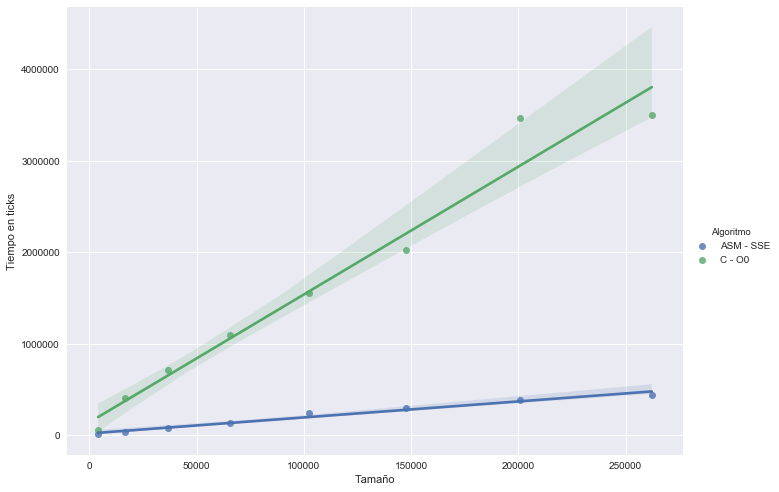

In [15]:
df = pd.read_csv('fourCombine-control.csv')

df['Algoritmo'] = df['Algoritmo'].map({1: 'ASM - SSE', 0: 'C - O0'})

df = df.groupby(['Algoritmo', 'Tamaño']).min()
df.reset_index(inplace=True)

sns.lmplot(x='Tamaño', y='Ticks', data=df, hue='Algoritmo', truncate=True, size=7, aspect=1.4)
plt.ylabel('Tiempo en ticks')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

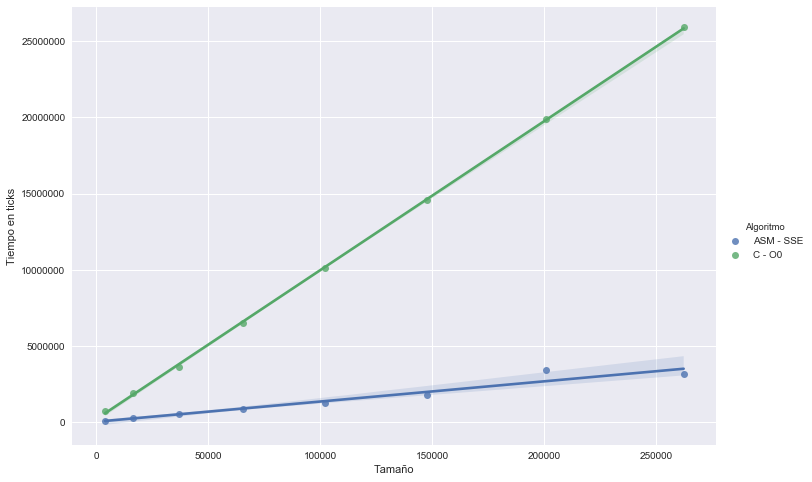

In [16]:
df = pd.read_csv('linearZoom-control.csv')

df['Algoritmo'] = df['Algoritmo'].map({1: 'ASM - SSE', 0: 'C - O0'})

df = df.groupby(['Algoritmo', 'Tamaño']).min()
df.reset_index(inplace=True)

sns.lmplot(x='Tamaño', y='Ticks', data=df, hue='Algoritmo', truncate=True, size=7, aspect=1.4)
plt.ylabel('Tiempo en ticks')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

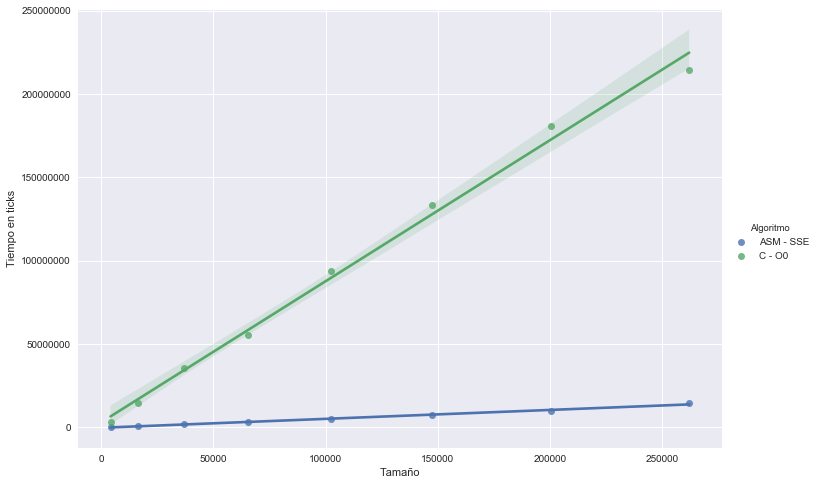

In [17]:
dfO0 = pd.read_csv('maxCloser-control.csv')


df = dfO0
df['Algoritmo'] = df['Algoritmo'].map({1: 'ASM - SSE', 0: 'C - O0'})

df = df.groupby(['Algoritmo', 'Tamaño']).min()
df.reset_index(inplace=True)

sns.lmplot(x='Tamaño', y='Ticks', data=df, hue='Algoritmo', truncate=True, size=7, aspect=1.4)
plt.ylabel('Tiempo en ticks')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

# Experimentos

In [ ]:
dfO0 = pd.read_csv('rgb2yuv-control.csv')

'''
dfO3 = pd.read_csv('rgb2yuv-O3.csv')
dfO3.set_index(['Algoritmo'], inplace=True)
dfO3.drop(1, inplace=True)
dfO3.reset_index(inplace=True)
dfO3['Algoritmo'] = dfO3['Algoritmo'].map({0: 2})

df = pd.concat([dfO0, dfO3], ignore_index=True)
df['Algoritmo'] = df['Algoritmo'].map({1: 'ASM - SSE', 0: 'C - O0', 2: 'C - O3'})
'''

df = dfO0
df['Algoritmo'] = df['Algoritmo'].map({1: 'ASM - SSE', 0: 'C - O0'})

df = df.groupby(['Algoritmo', 'Tamaño']).min()
df.reset_index(inplace=True)

sns.lmplot(x='Tamaño', y='Ticks', data=df, hue='Algoritmo', truncate=True, size=7, aspect=1.4)
plt.ylabel('Tiempo en ticks')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()